In [37]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
np.random.seed(0)

%matplotlib inline

In [30]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

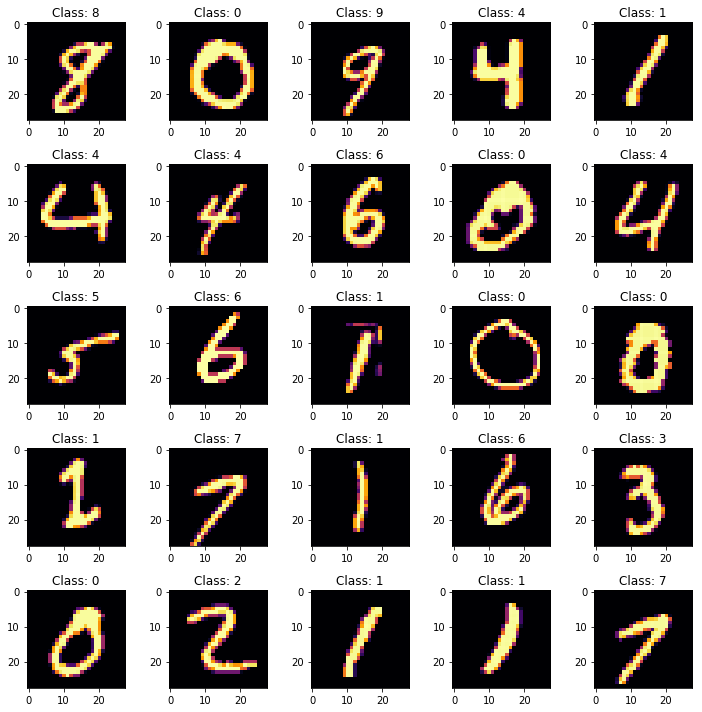

In [31]:
plt.figure(figsize=(10, 10))
for idx in range(25):
    plt.subplot(5, 5, idx + 1)
    plt.imshow(X_train[idx+55], cmap='inferno')
    plt.title('Class: {}'.format(y_train[idx+55]))
plt.tight_layout()

In [32]:
num_channels = 1
img_rows, img_cols = X_train.shape[1], X_train.shape[2]
X_train = X_train.reshape(-1, img_rows, img_cols, num_channels)

X_test = X_test.reshape(-1, img_rows, img_cols, num_channels)
input_shape = (img_rows, img_cols, num_channels)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [33]:
if np.max(X_train)> 1: X_train = X_train / 255
if np.max(X_test)> 1: X_test = X_test / 255

In [35]:
X_test.max()

1.0

In [36]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [38]:
# 5 => [0, 0, 0, 0, 0, 5, ... 0]

In [41]:
if len(y_train.shape) ==  1:
    num_classes = len(set(y_train))
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)    



In [43]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [46]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=(3,3)),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(metrics=['accuracy'], optimizer='adam', loss='categorical_crossentropy')

In [47]:
model.fit(X_train, y_train, batch_size=128, 
          epochs=3, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 25s 411us/step - loss: 0.1909 - acc: 0.9446 - val_loss: 0.0588 - val_acc: 0.9822
Epoch 2/3
60000/60000 [==============================] - 36s 605us/step - loss: 0.0493 - acc: 0.9845 - val_loss: 0.0443 - val_acc: 0.9861
Epoch 3/3
60000/60000 [==============================] - 36s 608us/step - loss: 0.0322 - acc: 0.9902 - val_loss: 0.0408 - val_acc: 0.9865


In [48]:
score = model.evaluate(X_test, y_test, verbose=0)

In [49]:
score

[0.040786006478080526, 0.9865]